In [1]:
import os
import numpy as np
from scipy.io import wavfile
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from IPython.display import Audio

from helpers import *

In [3]:
data_dir = "noise"
filenames = os.listdir(data_dir)

audios = [wavfile.read(os.path.join(data_dir, fn)) for fn in filenames]

/var/folders/r1/g8r4ph9s3h19bwdkrc7h_7sc0000gn/T/ipykernel_36830/1690505923.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  audios = [wavfile.read(os.path.join(data_dir, fn)) for fn in filenames]


ValueError: File format b'\x00\x00\x00\x01' not understood. Only 'RIFF' and 'RIFX' supported.

In [ ]:
aud = audios[2]

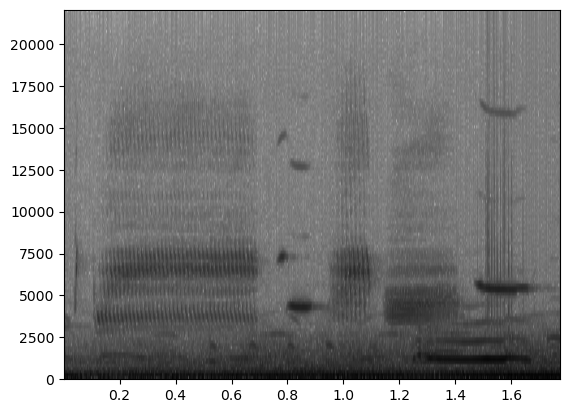

In [23]:
plot_spec(aud[1], aud[0], cmap="gray_r")

In [6]:
# high_song = filter(aud[1], aud[0], 2500, type="highpass")
noise = filter(aud[1], aud[0], 2000, type="lowpass")
# plot_spec(noise, aud[0], cmap="gray_r")

Audio(noise, rate=aud[0])

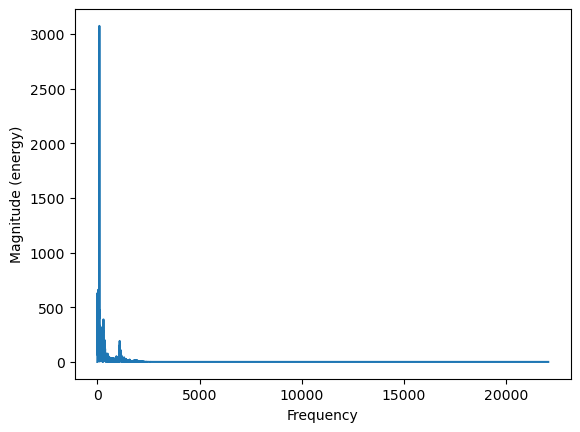

In [10]:
spec, freqs, _ = plt.magnitude_spectrum(noise, Fs=aud[0])

In [11]:
# generate back ground noise
# generate white noise
fs = 44100
mean = 0
std = 1
num_samples = 3 * fs
samples = np.random.normal(mean, std, size=num_samples)

Audio(scale_song(samples), rate=fs)

In [12]:
freqs[-1] = 22050
spec[-1] = 0

In [13]:
b = firwin2(5000, freqs, spec, fs=44100)

In [36]:
b = firwin2(5000, freqs, spec, fs=44100)
lfilt_result = lfilter(b, [0.5], samples)

In [37]:
Audio(lfilt_result, rate=44100)

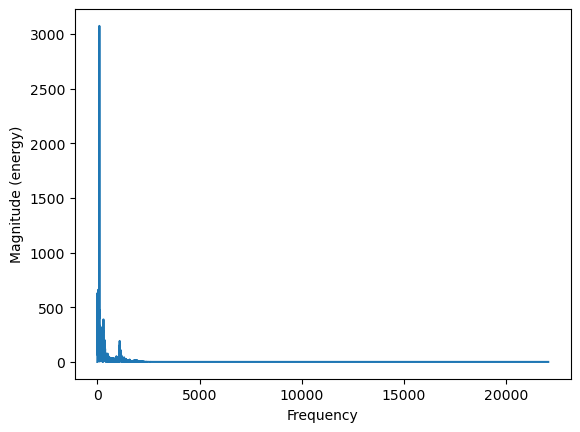

In [38]:
spec_re, freqs_re, _ = plt.magnitude_spectrum(noise, Fs=aud[0])

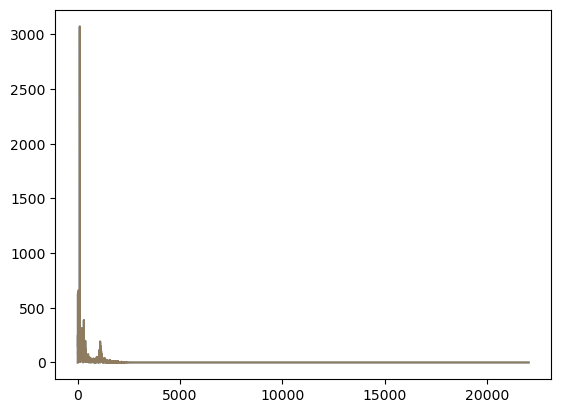

In [39]:
plt.plot(freqs, spec)
plt.plot(freqs_re, spec_re, alpha=.5)

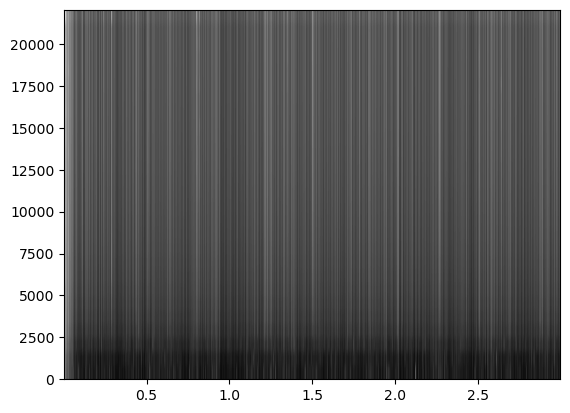

In [19]:
plot_spec(lfilt_result, fs=44100)

In [171]:
list_wav("segments/2015")

['bbom_2015324_8.wav',
 'bbom_2015324_9.wav',
 'bbom_2015330_2.wav',
 'bbom_2015330_1.wav',
 'bbom_2015330_0.wav',
 'bbom_2015324_10.wav',
 'bbom_2015324_11.wav',
 'bbom_2015324_13.wav',
 'bbom_2015324_12.wav',
 'bbom_2015324_16.wav',
 'bbom_2015324_15.wav',
 'bbom_2015324_14.wav',
 'bbom_2015324_2.wav',
 'bbom_2015324_3.wav',
 'bbom_2015324_1.wav',
 'bbom_2015324_0.wav',
 'bbom_2015324_4.wav',
 'bbom_2015324_5.wav',
 'bbom_2015324_7.wav',
 'bbom_2015324_6.wav']

In [4]:
sr, seg = wavfile.read("segments/2015/"+list_wav("segments/2015")[0])

In [5]:
print(list_wav("segments/2015")[0])

bwrm_20150402_0931_013_MA_2.wav


In [6]:
Audio(seg, rate=sr)

3
12
7
18


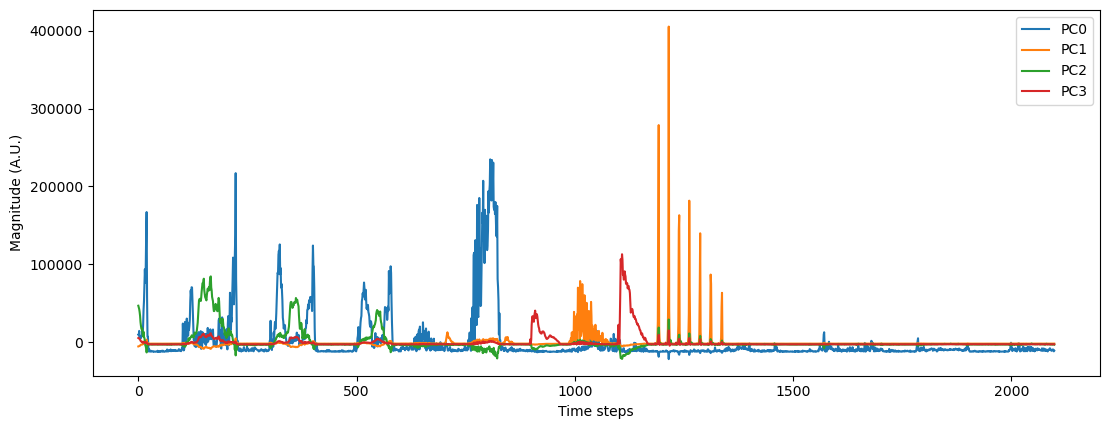

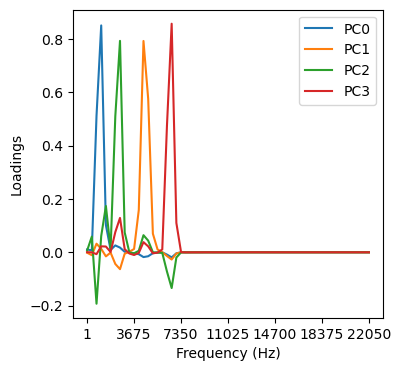

In [21]:
f, t, sxx = spectrogram(seg, fs=sr, window=("hann"), nperseg=120)

pca = PCA()
fitted_sxx = pca.fit_transform(sxx.T)
plt.figure(figsize=(13, 4.75))
for i in range(4):
    plt.plot(fitted_sxx[:,i], label=f"PC{i}")
    plt.xlabel("Time steps")
    plt.ylabel("Magnitude (A.U.)")

plt.legend()

plt.figure(figsize=(4, 4))
# plt.plot(np.cumsum(pca.explained_variance_ratio_), "o")


for i in range(4):
    plt.plot(pca.components_[i], label=f"PC{i}")
    print(np.argmax(pca.components_[i]))

idx = range(0, len(f), 10)
plt.xticks(idx, np.array(f[idx]).astype(int)+1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Loadings")
# plt.xticks(f)

plt.legend()



In [175]:
freq_comp = pca.components_[1] + pca.components_[3]

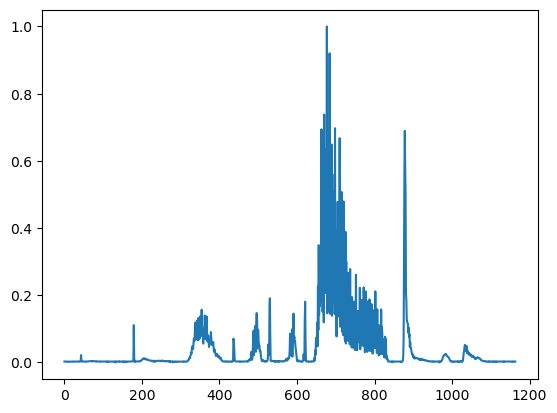

In [197]:
idx = 1
sr, new_seg = wavfile.read("segments/2015/"+list_wav("segments/2015")[idx])

sr, new_seg1 = wavfile.read("clear_bird_calls_raw/bbom_20150324_0847_005_PN_401b.wav")
sr, new_seg2 = wavfile.read("clear_bird_calls_raw/bbom_20150324_0847_005_PN_401c.wav")
sr, new_seg3 = wavfile.read("clear_bird_calls_raw/bbom_20150330_1102_031_PN_404g.wav")
sr, new_seg4 = wavfile.read("clear_bird_calls_raw/mrpy_20150330_1054_003_MA_452b.wav")

for new_seg in [new_seg4]:
    f, t, sxx = spectrogram(new_seg, fs=sr, window=("hann"), nperseg=120)
    isolate_freq = freq_comp @ sxx
    max_val, min_val = max(isolate_freq), min(isolate_freq)
    norm_isolate = (isolate_freq - min_val) / (max_val-min_val)

    # plt.figure()
    plt.plot(norm_isolate)
    # cumsum_act = np.cumsum(isolate_freq)
    # plt.figure()
    # plt.plot(cumsum_act/cumsum_act[-1])

In [183]:
Audio(new_seg, rate=sr)

In [187]:
print(list_wav("segments")[idx])

mbrb_20150410_0840_008_PN_5.wav


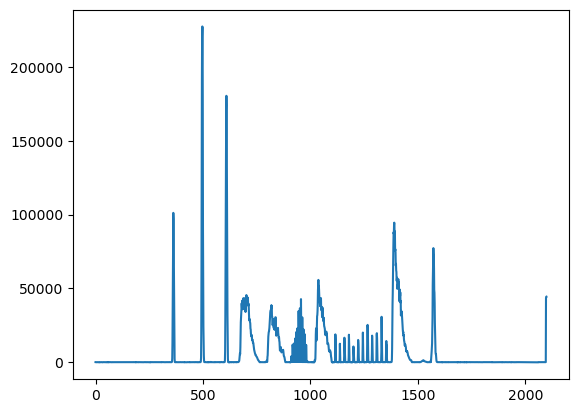

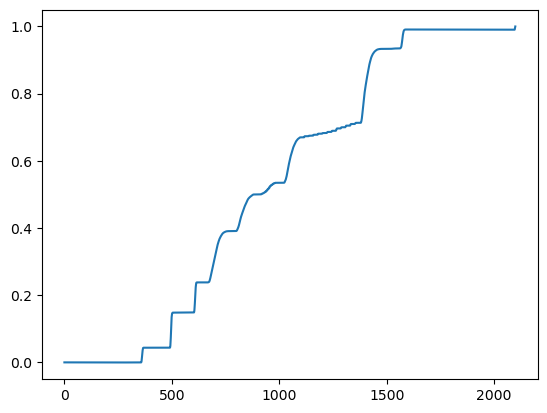

In [188]:
isolate_freq = freq_comp @ sxx
plt.plot(isolate_freq)
cumsum_act = np.cumsum(isolate_freq)
plt.figure()
plt.plot(cumsum_act/cumsum_act[-1])

[    0.    367.5   735.   1102.5  1470.   1837.5  2205.   2572.5  2940.
  3307.5  3675.   4042.5  4410.   4777.5  5145.   5512.5  5880.   6247.5
  6615.   6982.5  7350.   7717.5  8085.   8452.5  8820.   9187.5  9555.
  9922.5 10290.  10657.5 11025.  11392.5 11760.  12127.5 12495.  12862.5
 13230.  13597.5 13965.  14332.5 14700.  15067.5 15435.  15802.5 16170.
 16537.5 16905.  17272.5 17640.  18007.5 18375.  18742.5 19110.  19477.5
 19845.  20212.5 20580.  20947.5 21315.  21682.5 22050. ]


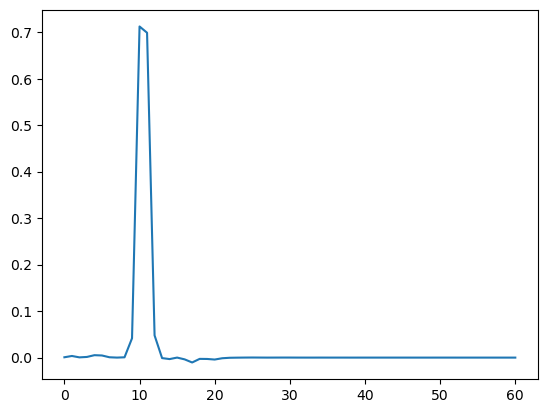

In [94]:
spec = pca.components_[0]
plt.plot(spec)
print(f)
f[0] = 0
f[-1] = 22050
spec[-1] = 0

b = firwin2(20000, f, spec, fs=44100)
lfilt_result = lfilter(b, [0.5], seg)

In [75]:
Audio(lfilt_result, rate=sr)

(array([[8.52069387e-16, 1.77887727e-13, 4.86271832e-14, ...,
         4.11700024e-01, 1.17206260e-01, 5.60618178e-01],
        [3.97247187e-14, 4.75230845e-15, 2.24156131e-12, ...,
         2.12191288e-01, 2.12143971e-01, 9.92506434e-01],
        [8.40780358e-14, 2.54407028e-13, 1.03806572e-12, ...,
         1.20372835e+00, 7.47488888e-01, 6.45084165e-01],
        ...,
        [2.69311354e-14, 1.76659989e-14, 1.55311179e-14, ...,
         2.50852358e-03, 7.86738671e-05, 1.02104454e-04],
        [2.68995701e-14, 1.76450129e-14, 1.55108535e-14, ...,
         2.50601452e-03, 7.85661971e-05, 1.01944397e-04],
        [1.34443417e-14, 8.81889885e-15, 7.75193509e-15, ...,
         1.25258945e-03, 3.92651778e-05, 5.09455622e-05]]),
 array([    0.        ,   256.39534884,   512.79069767,   769.18604651,
         1025.58139535,  1281.97674419,  1538.37209302,  1794.76744186,
         2051.1627907 ,  2307.55813953,  2563.95348837,  2820.34883721,
         3076.74418605,  3333.13953488,  3589.534

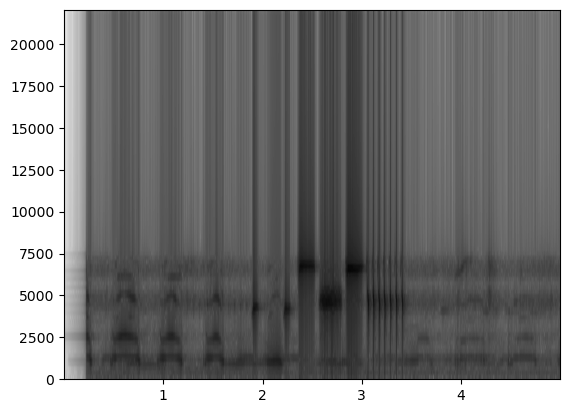

In [66]:
plot_spec(lfilt_result, sr)

In [54]:
Audio(seg, rate=sr)

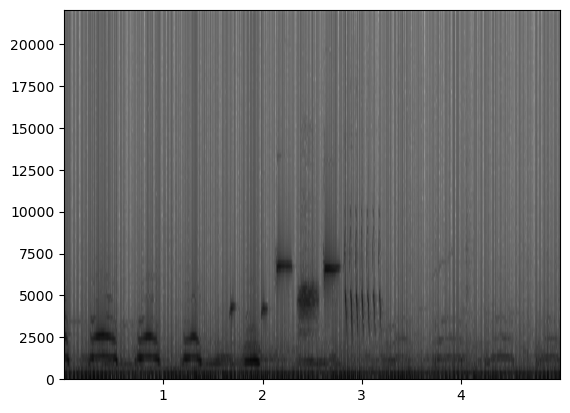

In [35]:
spec = plot_spec(seg, sr)

In [9]:
spec, f, t, im = spec

In [10]:
f.shape

(87,)

In [4]:
sxx.shape

(65, 1968)

In [31]:
from sklearn.decomposition import PCA
pca = PCA()

fitted_sxx = pca.fit_transform(sxx.T)

In [47]:
comp.shape

(65,)

In [15]:
comp = pca.components_
comp[:, 0] = 0
comp[:, 2] = 0
new_sxx = comp @ sxx

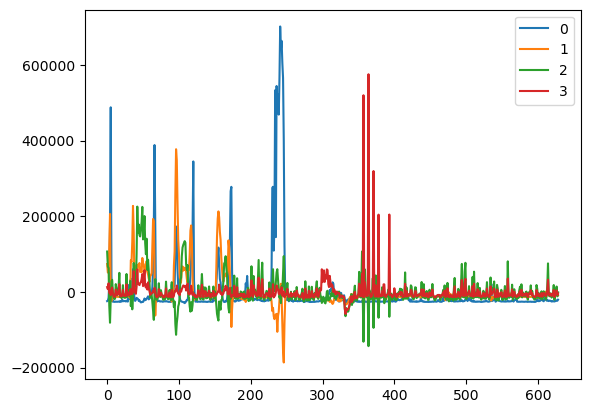

In [36]:
for i in range(4):
    plt.plot(fitted_sxx[:,i], label=f"{i}")

plt.legend()

# plot_spec(seg, sr)

In [40]:

Audio(seg, rate=sr)

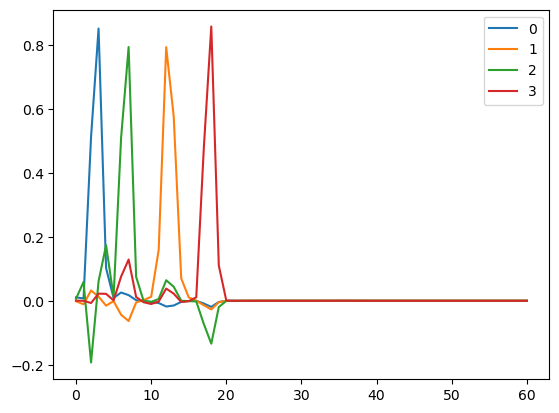

In [27]:
for i in range(4):
    plt.plot(pca.components_[i], label=f"{i}")
# plt.xticks(f)

plt.legend()